<a href="https://colab.research.google.com/github/LivroRelampagos/Estudo_de_Caso/blob/main/plota_Estrutura_Eletrica_LMA_Temporal_lagrangeano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plota figura da Evolução da Estrutura Elétrica da Nuvem**

---
**OBJETIVO:** Este Google Colab plota a distribuição vertical de fontes e flashes em função da altura e tempo durante a evolução temporal de uma tempestade.



---



**DADOS DE ENTRADA**: Fontes e strokes. 

- **Tipo do dado:** 
    1. Fontes da rede SPLMA e strokes da rede BrasilDAT. Estão num mesmo arquivo em formato ASCII separados por imagem do radar da FCTH.
- **Formato do dado:** ASCII
- **Nome do arquivo:** tempestade_7_20120109_1708.csv
- **Gerado por:** Gerado na pasta 1_rastreamento_tempestade_radar por Enrique Mattos - IRN/UNIFEI 


---

**DADOS DE SAÍDA:** Figuras contendo a distribuição vertical-temporal de fontes de VHF com relâmpagos da SPLMA e strokes da BrasilDAT.
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos PNG 
- **Nome do arquivo:** São geradas três figuras.

    1. Distribuição vertical considerando a altura de todas as fontes de um relâmpago: **tempestade_7_fig1_Estrutura_eletrica_temporal_todasfontes.png**

    2. Distribuição vertical considerando a altura da primeira fonte de um relâmpago: **tempestade_7_fig2_Estrutura_eletrica_temporal_primeirafonte.png**
    
    3. Distribuição vertical considerando a altura das 10% das primeiras fontes de um relâmpago: **tempestade_7_fig3_Estrutura_eletrica_temporal_10%primeirasfonte.png**

- **Gerado por:** Enrique Mattos - IRN/UNIFEI 

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Importação das bibliotecas
3.   Importa funções
4.   Monta o intervalo de classe
5.   Download dos dados do radar, através do Dropbox
6.   Para as três análises são realizados os mesmos procedimentos que são:
    a. Realiza os cálculos: 
    b. Contabiliza a quantidade de fontes por altura e hora da imagem do radar
    c. Plota figura


---
**OBSERVAÇÕES IMPORTANTES**: 
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive 
    - 2. Número da tempestade

---

- **Realizado por:** Enrique V. Mattos - 11/dez/2021 
- **Atualizado por:** Enrique V. Mattos e Raquel Gonçalves Pereira - 10/03/2022


# **### >>> MUDANÇAS AQUI <<< ###**

- **Insira o caminho do seu drive**: alterar aqui

In [ ]:
dir = '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/'

- **Caminhos dos diretórios**: aqui não precisa alterar

In [ ]:
# nome do arquivo de rastreamento da tempestade
storm_name = f'tempestade'

# definindo os caminhos 
path_input = f'{dir}1_rastreamento_tempestades_radar_FCTH/output/'  # caminho do arquivo de rastreamento da tempestade
path_output = f'{dir}5_plota_estrutura_eletrica_temporal/output/' # caminho onde as figuras serão salvas

# exibe na tela
print(path_input)
print(path_output)

/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/
/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/5_plota_estrutura_eletrica_temporal/output/


# **Instala Bibliotecas**

In [ ]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install proplot==0.6.4
print('\n')

# Instalando o py_art (biblioteca para trabalhar com dados de radar)
!pip install arm_pyart
print('\n')

     |████████████████████████████████| 7.9 MB 11.6 MB/s 


     |████████████████████████████████| 11.0 MB 8.9 MB/s 
  Created wheel for arm-pyart: filename=arm_pyart-1.11.8-cp37-cp37m-linux_x86_64.whl size=10224534 sha256=edf295b181c61407dc6acfce8a2c104770b4714179b2c6287fe06548dee560be
  Stored in directory: /root/.cache/pip/wheels/23/02/96/a0b69bde93fa0b3bf284859b42c28f28df49f557e93ae5ad02
Successfully built arm-pyart




# **Importa bibliotecas**

In [ ]:
import glob
from tqdm.notebook import tqdm_notebook
import numpy as np
import proplot as plot
import pyart
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/proplot/config.py:1454: ProPlotWarning: Rebuilding font cache.



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import regist

**monta drive para salvar arquivos de saída**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Cria a pasta para as figuras de sáida**


In [ ]:
import os
os.makedirs(f'{path_output}', exist_ok=True)

# **Importa funções**

In [ ]:
#-----------------------------------------------------------------------------------   
# Plota isotermas para o gráfico timeXheight Plots 
#----------------------------------------------------------------------------------- 
def evm_plot_isoterms_timexheight_plots(temperaturas, xmin, xmax):

    """
    Plota linhas horizontais das isotermas

    Parâmetros de entrada:
                temperaturas (lista): temperaturas as serem plotadas 
                xmin (float): valor mínimo do eixo X  
                xmax (float): valor máximo do eixo X 

    Parâmetros de saída:
                plota a isoterma com o label da temperatura em graus Celsius
    """

    import pandas as pd

    # Leitura do DataFrame
    df = pd.read_csv(f'{dir}5_plota_estrutura_eletrica_temporal/temp_alt.txt', delimiter=';') 
    
    # Loop das isotermas que pretende-se plotar
    for temperatura in temperaturas:

        # estrai a altura daquela isoterma        
        alt = df[df['temp_degre'] == temperatura]['alt_metros']
        
        # plota a linha tracejada
        ax2.plot([xmin, xmax], [alt/1000.,alt/1000.], linewidth=1.5, linestyle='--', color='gray')

        # plota o nome da isoterma
        ax2.text( xmax-(0.07*xmax), (alt/1000.)+0.2, f'{str(temperatura)}$\degree$C', size=12)

#-----------------------------------------------------------------------------------   
# Leitura dos dados de raios por imagem de radar 
#----------------------------------------------------------------------------------- 
def read_raios_porimagem(filename):

    ''' Função para ler os dados de relâmpagos da Brasildat e SPLMA separados por imagem de radar

    Exemplo do dado:
            INI_FLASH_LMA=55;Fontes=2
            area(km2);duracao(s);comprimento(km);ano;mes;dia;hor;min;seg;lat;lon;alt(m) 
            52.55;0.197991;7.25;2011;12;13;22;19;56.339645;-24.1650;-47.4339;7567.9000
            52.55;0.197991;7.25;2011;12;13;22;19;56.368057;-24.1565;-47.4044;8132.4000
            END_FLASH_LMA 

            INI_FLASH_BRASILDAT=3
            tipo;ano;mes;dia;hor;min;seg;lat;lon;pc(kA) 
            IC;2011;12;13;22;19;21.755556;-24.1796;-47.4274;4.4000
            IC;2011;12;13;22;19;21.778186;-24.1503;-47.4200;8.2000
            IC;2011;12;13;22;19;23.290068;-24.1121;-47.4872;5.3000
            END_FLASH_BRASILDAT   

    Parâmetros:
                filename (string): nome do arquivo com os dados de relâmpagos
                
    Retorna:
             dic_br (dicionario): dicionario com as informações dos relâmpagos da Brasildat
             dic_lma (dicionario): dicionario com as informações dos relâmpagos da SPLMA
    '''

    # Define variaveis da Brasildat
    tipo_br, ano_br, mes_br, dia_br, hor_br, min_br, seg_br, lat_br, lon_br, pc_br = [], [], [], [], [], [], [], [], [], []

    # Define os dicionários que serão alojados os dados da Brasildat e SPLMA
    dic_br = {}
    dic_lma = {}
    nflashes_lma = 0 # quantidade de relâmpagos da SPLMA do arquivo

    # Leitura do arquivo 
    with open(filename, 'r') as file:
        rawdata = file.readlines()

    # Extrai as informações do arquivo 
    for i in range(len(rawdata)):

        # quebra a linha onde tem ';' e coloca numa lista
        linha = rawdata[i].split(';')
    
        # identificando o tipo de linha
        if len(linha) == 0:
            pass

        # LINHA DA BRASILDAT
        elif linha[0][0:19] == 'INI_FLASH_BRASILDAT':

            # extrai a quantidade de relâmpagos
            lixo, nbr = linha[0].strip().split('=')

            # loop dos relâmpagos da brasildat
            for ii in range(i+2, i+2+int(nbr), 1):
                tipo, ano, mes, dia, hor, min, seg, lat, lon, pc = rawdata[ii].strip().split(';')
                tipo_br.append(tipo)
                ano_br.append(ano)
                mes_br.append(mes)
                dia_br.append(dia)
                hor_br.append(hor)
                min_br.append(min)
                seg_br.append(seg)
                lat_br.append(lat)
                lon_br.append(lon)
                pc_br.append(pc)

            # coloca as informações dos relãmpagos da brasildat num dicionário
            dic_br = {'tipo': tipo_br,
                      'ano': ano_br,
                      'mes': mes_br,
                      'dia': dia_br,
                      'hor': hor_br,
                      'min': min_br,
                      'seg': seg_br,
                      'lat': lat_br,
                      'lon': lon_br,
                      'pc': pc_br
                      } 

        # LINHA DA SPLMA
        elif linha[0][0:13] == 'INI_FLASH_LMA':

            # extrai o número do flash e quantidade de fontes
            lixo, flash_id = linha[0].split('=')
            lixo, nfontes = linha[1].strip().split('=')
            nflashes_lma = flash_id
            flash_id = 'flash' + str(flash_id)

            #print('aki', flash_id, nfontes)
        
            # loop nas fontes daquele flash
            area_lma, dur_lma, comp_lma, ano_lma, mes_lma, dia_lma, hor_lma, min_lma, seg_lma, lat_lma, lon_lma, alt_lma = [], [], [], [], [], [], [], [], [], [], [], []
            for jj in range(i+2, i+2+int(nfontes), 1):
                area0, dur0, comp0, ano0, mes0, dia0, hor0, min0, seg0, lat0, lon0, alt0 = rawdata[jj].strip().split(';')
            
                area_lma = area0
                dur_lma = dur0
                comp_lma = comp0
                ano_lma.append(ano0)
                mes_lma.append(mes0)
                dia_lma.append(dia0)
                hor_lma.append(hor0)
                min_lma.append(min0)
                seg_lma.append(seg0)
                lat_lma.append(lat0)
                lon_lma.append(lon0)
                alt_lma.append(alt0)

            # colocar as informações do flash num dicionário
            # self.family_data.update({actual_family_id: {'header': [], 'evolution': [], 'ending_line': []}})
            ###dic_lma.update({flash_id: {'alt': alt0}})
            dic_lma.update({flash_id: { 'fontes': nfontes, 
                                        'area': area_lma, 
                                        'dur': dur_lma,
                                        'comp': comp_lma, 
                                        'ano': ano_lma, 
                                        'mes': mes_lma, 
                                        'dia': dia_lma, 
                                        'hor': hor_lma, 
                                        'min': min_lma, 
                                        'seg': seg_lma, 
                                        'lat': lat_lma, 
                                        'lon': lon_lma,
                                        'alt': alt_lma
                            }})

    return dic_br, dic_lma, int(nbr), int(nflashes_lma)

In [ ]:
# Teste
#filename = f'{path_input}/tempestade_1_20111213_2315.csv'
#dic_br, dic_lma, nbr, nflashes_lma = read_raios_porimagem(filename)
#print(nflashes_lma, nbr) 
#print(dic_lma['flash1']['fontes'])
#print(dic_lma['flash2']['fontes'])

# **Monta os intervalos de classes**

**Monta a lista dos arquivos**

In [ ]:
files = sorted(glob.glob(f'{path_input}/{storm_name}_*csv'))
ntimes = len(files)
print(ntimes)
print(files)

23
['/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1703.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1708.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1713.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1718.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1723.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1728.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1733.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1738.csv', '/content/drive/MyDr

**Monta as classes de alturas e tempos**

In [ ]:
# Exemplo:
#alts = np.arange(2,16)
#tempos = np.arange(1,ntimes+1)
#alt_y, time_x  = np.meshgrid(alts, tempos)

# classes das alturas [0-0.5, 0.5-1.0, ...]
classes_altura = np.arange(0, 20, 0.5)

# monta as bordas das classes de alturas
y, edges = np.histogram([1,1,1], classes_altura)

# monta o nome dos centros das classes das alturas
centers_altura = 0.5*(edges[1:] + edges[:-1])

# quantidade de classes de alturas
ncenters_altura = len(centers_altura)

# tempos 
tempos = np.arange(1, ntimes+1)

# transforma em matriz de 2D 
alt_y, time_x  = np.meshgrid(centers_altura, tempos)

#print(time_x)
#print('---------------------------------------------------------------')
#print(alt_y)

In [ ]:
tempos

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [ ]:
centers_altura

array([ 0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,  4.25,
        4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,  8.75,
        9.25,  9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25,
       13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75,
       18.25, 18.75, 19.25])

# 1) ESTRUTURA VERTICAL: **TODAS AS FONTES**

**Cálculos**

In [ ]:
# Inicialização das variáveis
hormin = [] # hora e minuto
raios = np.zeros((ntimes, ncenters_altura)) # matriz de flashes por tempo e altura

flashes_lma_porimg = [] # quantidade de flashes por imagem
fontes_lma_porimg = [] # quantidade de fontes por imagem
strokes_br_porimg = [] # quantidade de strokes por imagem

# Loop dos tempos
for time, file in enumerate(files):

    print('Processando arquivo ===>>>', file)

    # monta horamin
    hormin.append(file[-8:-4])

    # leitura do arquivo ASCII de relâmpagos
    dic_br, dic_lma, nstrokes_br, nflashes_lma = read_raios_porimagem(file)

    # processamento LMA
    total_fontes = 0
    total_strokes = 0
    if nflashes_lma > 0:

        # Loop em cada relâmpago da SPLMA
        for i in range(1, nflashes_lma+1):

            # monta a identificação do flash (flash1)
            flash_id = 'flash' + str(i)
          
            # extrai as alturas
            alturas = (dic_lma[f'{flash_id}']['alt'])

            # transforma altura de metros para km
            alturas = [float(j)/1000. for j in alturas]

            # soma o total de fontes de cada imagem do radar (=#dic_lma['flash2']['fontes'])            
            total_fontes+= int(dic_lma[f'{flash_id}']['fontes'])
            
            # calcula a quantidade de eventos para cada classe de altura
            eventos, edges = np.histogram(alturas, classes_altura)
       
            # calcula matriz de raios 
            for indice_altura, evento in enumerate(eventos):
                raios[time, indice_altura]+= int(evento)  

    # salva a quantidade de flashes_lma de cada imagem do radar
    flashes_lma_porimg.append(nflashes_lma) 

    # salva o total de fontes de cada imagem do radar 
    fontes_lma_porimg.append(total_fontes) 

    # salva o total de strokes da brasildat de cada imagem do radar 
    strokes_br_porimg.append(nstrokes_br) 

# mascara onde raios < 0
#raios = np.ma.masked_array(raios, raios < 0)
#raios[ (raios == 0.0) ] = -99.0
raios

Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1703.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1708.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1713.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1718.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1723.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1728.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempest

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  

**Plota figura**

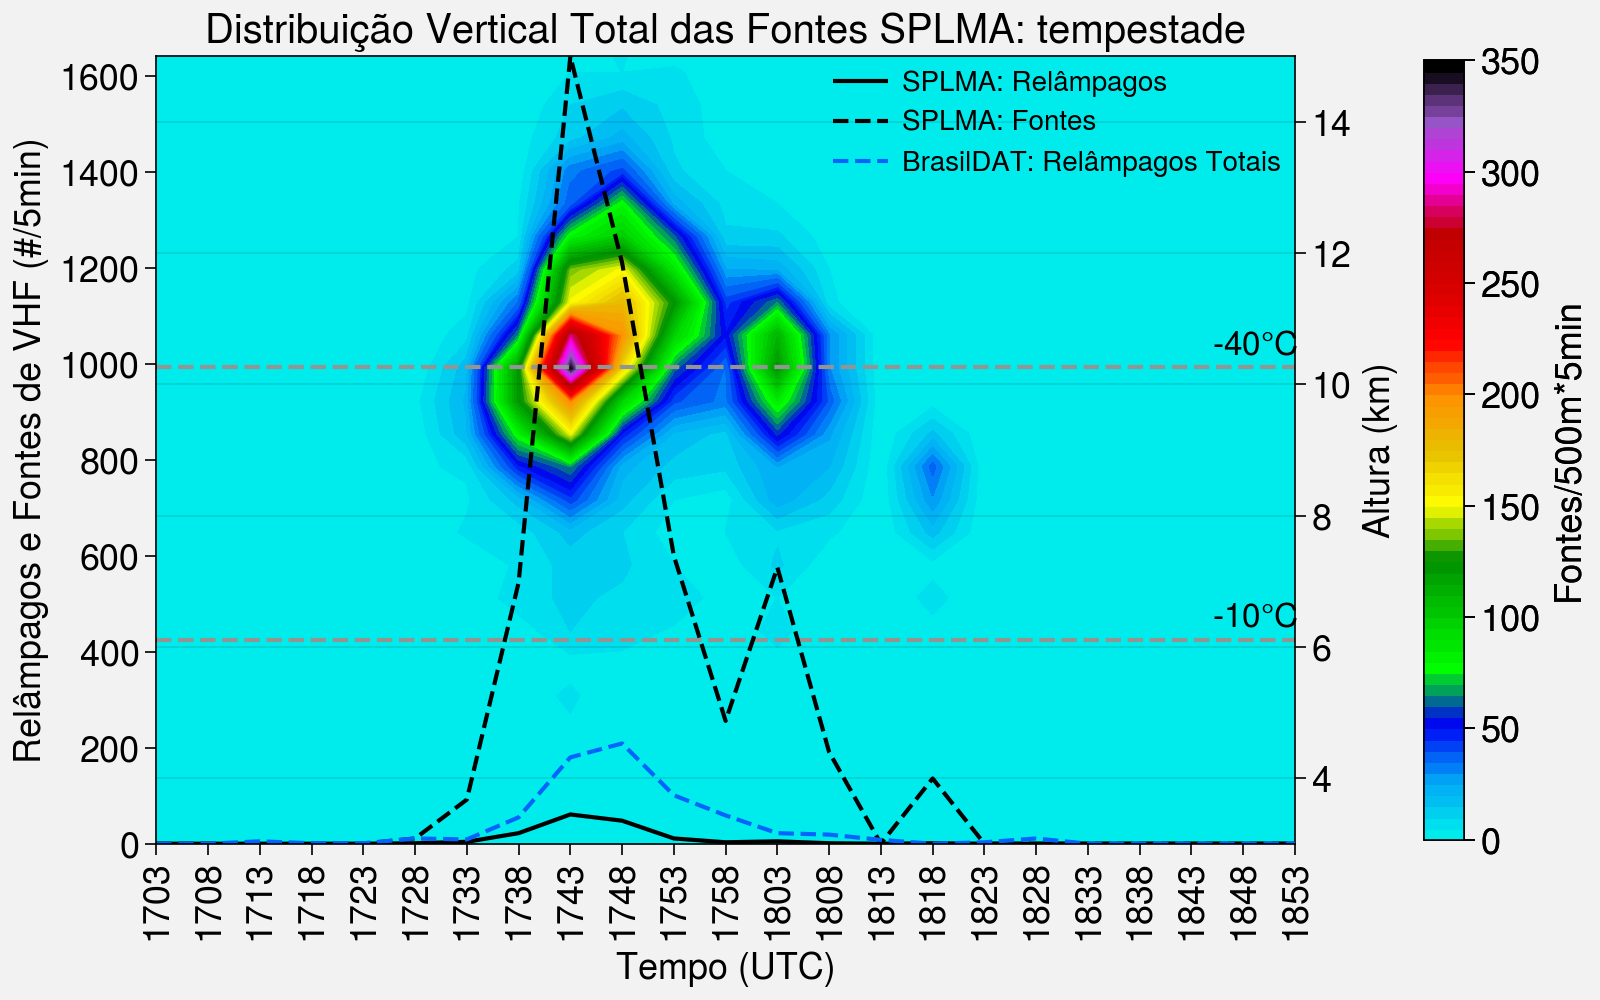

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(8,5), tight=True)

#-----------------------#
# Figura linear: flashes
#-----------------------#
# plota linha das fontes
ax.plot(plot.arange(1, ntimes, 1), np.array(flashes_lma_porimg), linewidth=1.5, linestyle='-', color='black', label='SPLMA: Relâmpagos')
ax.plot(plot.arange(1, ntimes, 1), np.array(fontes_lma_porimg), linewidth=1.5, linestyle='--', color='black', label='SPLMA: Fontes')
ax.plot(plot.arange(1, ntimes, 1), np.array(strokes_br_porimg), linewidth=1.5, linestyle='--', color='bright blue', label='BrasilDAT: Relâmpagos Totais')

# formato do segundo eixo Y (a direita)
xticks = plot.arange(1, ntimes, 1)
ax.format(ylabel='Relâmpagos e Fontes de VHF (#/5min)', ytickminor=False, ylim=(0, np.max(flashes_lma_porimg+strokes_br_porimg+fontes_lma_porimg)), grid=False,
          xticklabels=hormin, xticks=xticks, xrotation=90, small='18px', large='20px')

# legenda
ax.legend(ncols=1, frameon=False, fontsize=10)

#-----------------------#
#    Figura Mapa
#-----------------------#
# eixos gêmeos em x
ax2 = ax.twinx()

# plota figura
map1 = ax2.contourf(time_x, alt_y, raios, cmap='pyart_NWSRef', levels=plot.arange(0., 350, 5))

# formatação dos eixos
ax2.format(title=f'Distribuição Vertical Total das Fontes SPLMA: {storm_name}', xlabel='Tempo (UTC)', ylabel='Altura (km)',
          xtickminor=False, ytickminor=False, grid=True,
          xticklabels=hormin, xticks=xticks, 
          ylim=(3, 15), small='18px', large='20px', xrotation=90)

# plota isotermas
evm_plot_isoterms_timexheight_plots([-10, -40], xticks[0], xticks[-1])

# barra de cores
fig.colorbar(map1, label='Fontes/500m*5min', ticks=50, ticklabelsize=13, labelsize=13, width=0.2, length=0.99, orientation="vertical", pad=0.2)
             
# salva figura
fig.save(f'{path_output}fig1_Estrutura_eletrica_temporal_todasfontes.png', dpi=300)
fig.save(f'{dir}Fig4_Estrutura_eletrica_temporal_todasfontes.png', dpi=300)  

# 2) ESTRUTURA VERTICAL: **PRIMEIRA FONTE**

**Cálculos**

In [ ]:
hormin = []
raios_primeira = np.zeros((ntimes, ncenters_altura))
flashes_lma_porimg = []
fontes_lma_porimg = []
strokes_br_porimg = [] # quantidade de strokes por imagem

# Loop dos tempos
for time, file in enumerate(files):

    print('Processando arquivo ===>>>', file)

    # monta horamin
    hormin.append(file[-8:-4])

    # leitura do arquivo ASCII de relâmpagos
    dic_br, dic_lma, nstrokes_br, nflashes_lma = read_raios_porimagem(file)

    # processamento
    total_fontes = 0
    if nflashes_lma > 0:

        # Loop em cada relâmpago da SPLMA
        for i in range(1, nflashes_lma+1):

            # monta a identificação do flash (flash1)
            flash_id = 'flash' + str(i)
          
            # extrai as alturas
            alturas = (dic_lma[f'{flash_id}']['alt'])

            # transforma altura de metros para km
            alturas = [float(j)/1000. for j in alturas]

            # seleciona a altura apenas da primeira fonte
            alturas = alturas[0]

            # soma o total de fontes de cada imagem do radar
            #dic_lma['flash2']['fontes']
            total_fontes = total_fontes + int(dic_lma[f'{flash_id}']['fontes'])
            
            # calcula a quantidade de eventos para cada classe de altura
            eventos, edges = np.histogram(alturas, classes_altura)
       
            # calcula matriz de raios 
            for indice_altura, evento in enumerate(eventos):
                raios_primeira[time, indice_altura] = int(evento) + raios_primeira[time, indice_altura]      

    # salva a quantidade de flashes_lma de cada imagem do radar
    flashes_lma_porimg.append(nflashes_lma) 

    # salva o total de fontes de cada imagem do radar 
    fontes_lma_porimg.append(total_fontes)       
    
    # salva o total de strokes da brasildat de cada imagem do radar 
    strokes_br_porimg.append(nstrokes_br) 

Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1703.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1708.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1713.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1718.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1723.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1728.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempest

In [ ]:
alturas

9.8335

**Plota figura**

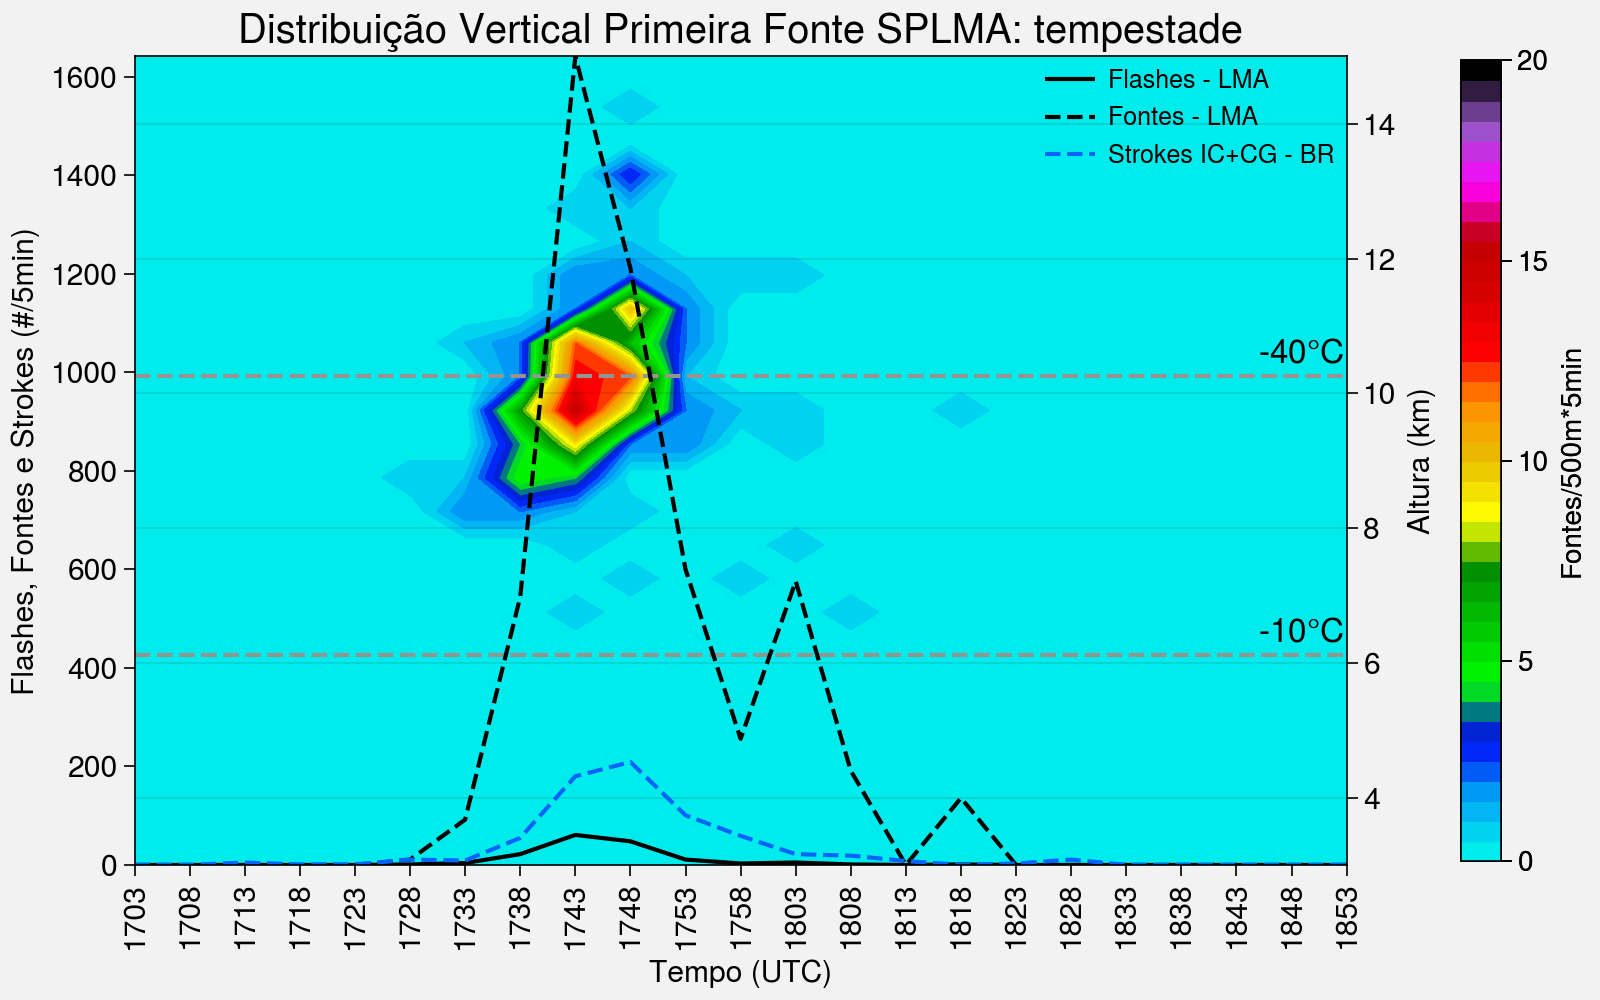

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(8,5), tight=True)

#-----------------------#
# Figura linear: flashes
#-----------------------#
# plota linha das fontes
ax.plot(plot.arange(1, ntimes, 1), np.array(flashes_lma_porimg), linewidth=1.5, linestyle='-', color='black', label='Flashes - LMA')
ax.plot(plot.arange(1, ntimes, 1), np.array(fontes_lma_porimg), linewidth=1.5, linestyle='--', color='black', label='Fontes - LMA')
ax.plot(plot.arange(1, ntimes, 1), np.array(strokes_br_porimg), linewidth=1.5, linestyle='--', color='bright blue', label='Strokes IC+CG - BR')

# formato do segundo eixo Y (a direita)
xticks = plot.arange(1, ntimes, 1)
ax.format(ylabel='Flashes, Fontes e Strokes (#/5min)', ytickminor=False, ylim=(0, np.max(flashes_lma_porimg+strokes_br_porimg+fontes_lma_porimg)), grid=False,
          xticklabels=hormin, xticks=xticks, xrotation=90, small='15px', large='20px')

# legenda
ax.legend(ncols=1, frameon=False)

#-----------------------#
#    Figura Mapa
#-----------------------#
# eixos gêmeos em x
ax2 = ax.twinx()

# plota figura
map1 = ax2.contourf(time_x, alt_y, raios_primeira, cmap='pyart_NWSRef', levels=plot.arange(0., 20, 0.5))

# formatação dos eixos
ax2.format(title=f'Distribuição Vertical Primeira Fonte SPLMA: {storm_name}', xlabel='Tempo (UTC)', ylabel='Altura (km)',
          xtickminor=False, ytickminor=False, grid=True,
          xticklabels=hormin, xticks=xticks, 
          ylim=(3, 15), small='15px', large='20px', xrotation=90)

# plota isotermas
evm_plot_isoterms_timexheight_plots([-10, -40], xticks[0], xticks[-1])

# barra de cores
fig.colorbar(map1, label='Fontes/500m*5min', ticks=5, ticklabelsize=10, labelsize=10, width=0.2, length=0.99, orientation="vertical", pad=0.2)

# salva figura
fig.save(f'{path_output}fig2_Estrutura_eletrica_temporal_primeirafonte.png', dpi=300) 

# 3) ESTRUTURA VERTICAL: **10% PRIMEIRAS FONTES**

**Cálculos**

In [ ]:
hormin = []
raios_10primeiras = np.zeros((ntimes, ncenters_altura))
flashes_lma_porimg = []
fontes_lma_porimg = []
strokes_br_porimg = [] # quantidade de strokes por imagem


# Loop dos tempos
for time, file in enumerate(files):

    print('Processando arquivo ===>>>', file)

    # monta horamin
    hormin.append(file[-8:-4])

    # leitura do arquivo ASCII de relâmpagos
    dic_br, dic_lma, nstrokes_br, nflashes_lma = read_raios_porimagem(file)

    # processamento
    total_fontes = 0
    if nflashes_lma > 0:

        # Loop em cada relâmpago da SPLMA
        for i in range(1, nflashes_lma+1):

            # monta a identificação do flash (flash1)
            flash_id = 'flash' + str(i)
          
            # extrai as alturas
            alturas = (dic_lma[f'{flash_id}']['alt'])

            # transforma altura de metros para km
            alturas = [float(j)/1000. for j in alturas]

            # seleciona a altura das primeiras 10% das fontes do flash
            qtefontes_10porcento = int(int(dic_lma[f'{flash_id}']['fontes'])/10.)

            # calcula a altura média das primeiras 10% das fontes do flash
            alturas = np.mean(alturas[0: qtefontes_10porcento])
            
            # soma o total de fontes de cada imagem do radar
            #dic_lma['flash2']['fontes']
            total_fontes+= int(dic_lma[f'{flash_id}']['fontes'])
            
            # calcula a quantidade de eventos para cada classe de altura
            eventos, edges = np.histogram(alturas, classes_altura)
       
            # calcula matriz de raios 
            for indice_altura, evento in enumerate(eventos):
                raios_10primeiras[time, indice_altura] = int(evento) + raios_10primeiras[time, indice_altura]      

    # salva a quantidade de flashes_lma de cada imagem do radar
    flashes_lma_porimg.append(nflashes_lma) 

    # salva o total de fontes de cada imagem do radar 
    fontes_lma_porimg.append(total_fontes)       
    
    # salva o total de strokes da brasildat de cada imagem do radar 
    strokes_br_porimg.append(nstrokes_br) 

Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1703.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1708.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1713.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1718.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1723.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1728.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempest

**Plota figura**

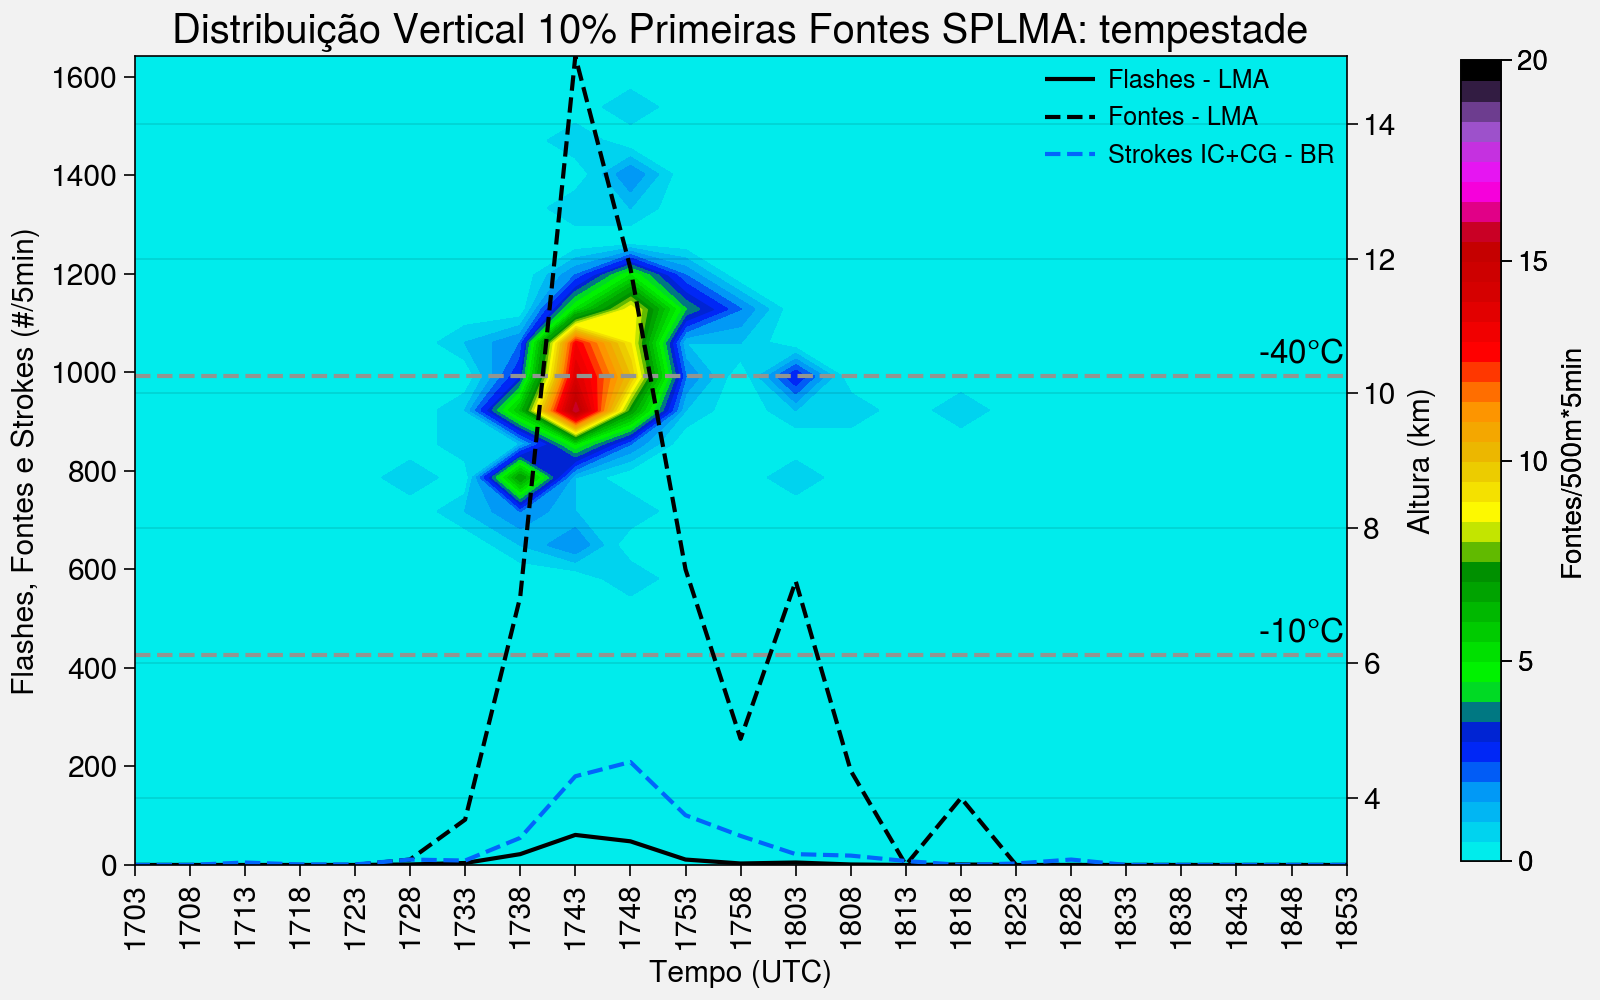

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(8,5), tight=True)

#-----------------------#
# Figura linear: flashes
#-----------------------#
# plota linha das fontes
ax.plot(plot.arange(1, ntimes, 1), np.array(flashes_lma_porimg), linewidth=1.5, linestyle='-', color='black', label='Flashes - LMA')
ax.plot(plot.arange(1, ntimes, 1), np.array(fontes_lma_porimg), linewidth=1.5, linestyle='--', color='black', label='Fontes - LMA')
ax.plot(plot.arange(1, ntimes, 1), np.array(strokes_br_porimg), linewidth=1.5, linestyle='--', color='bright blue', label='Strokes IC+CG - BR')

# formato do segundo eixo Y (a direita)
xticks = plot.arange(1, ntimes, 1)
ax.format(ylabel='Flashes, Fontes e Strokes (#/5min)', ytickminor=False, ylim=(0, np.max(flashes_lma_porimg+strokes_br_porimg+fontes_lma_porimg)), grid=False,
          xticklabels=hormin, xticks=xticks, xrotation=90, small='15px', large='20px')

# legenda
ax.legend(ncols=1, frameon=False)

#-----------------------#
#    Figura Mapa
#-----------------------#
# eixos gêmeos em x
ax2 = ax.twinx()

# plota figura
map1 = ax2.contourf(time_x, alt_y, raios_10primeiras, cmap='pyart_NWSRef', levels=plot.arange(0., 20, 0.5))

# formatação dos eixos
ax2.format(title=f'Distribuição Vertical 10% Primeiras Fontes SPLMA: {storm_name}', xlabel='Tempo (UTC)', ylabel='Altura (km)',
          xtickminor=False, ytickminor=False, grid=True,
          xticklabels=hormin, xticks=xticks, 
          ylim=(3, 15), small='15px', large='20px', xrotation=90)

# plota isotermas
evm_plot_isoterms_timexheight_plots([-10, -40], xticks[0], xticks[-1])

# barra de cores
fig.colorbar(map1, label='Fontes/500m*5min', ticks=5, ticklabelsize=10, labelsize=10, width=0.2, length=0.99, orientation="vertical", pad=0.2)

# salva figura
fig.save(f'{path_output}fig3_Estrutura_eletrica_temporal_10%primeirasfonte.png', dpi=300) 